## Problem Statement

A coffee retail chain wants to turn its transaction logs into business actions. The available datasets contain transaction 
timestamps, payment type, customer identifiers, product names, and sale amounts. The company needs a reproducible Pandas 
workflow that converts raw logs into insights for marketing, staffing, and inventory decisions, and that can also identify 
high-value customers for targeted offers.

# Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Understand the Data](#read)**
    - 2.2 - **[Exploratory Data Analysis](#eda)**

<a id="lib"></a>
## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<a id="lib"></a>
## 2. Data Preparation

In [2]:
# Load the DATASETS
df1 = pd.read_csv("index_1.csv")
df2 = pd.read_csv("index_2.csv")

<a id="lib"></a>
### 2.3 - Understand the Data

In [3]:
df1.head(2)

,date,datetime,cash_type,card,money,coffee_name
0,01-03-24,15:50.5,card,ANON-0000-0000-0001,38.7,Latte
1,01-03-24,19:22.5,card,ANON-0000-0000-0002,38.7,Hot Chocolate


In [4]:
df2.tail(2)

,date,datetime,cash_type,money,coffee_name
260,23-03-25,23-03-25 18:01,card,28,Vanilla with Irish whiskey
261,23-03-25,23-03-25 21:23,card,29,Coffee with Irish whiskey


In [5]:
df1.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [6]:
df2.columns

Index(['date', 'datetime', 'cash_type', 'money', 'coffee_name'], dtype='object')

In [7]:
df1.info

<bound method DataFrame.info of           date datetime cash_type                 card  money    coffee_name
0     01-03-24  15:50.5      card  ANON-0000-0000-0001  38.70          Latte
1     01-03-24  19:22.5      card  ANON-0000-0000-0002  38.70  Hot Chocolate
2     01-03-24  20:18.1      card  ANON-0000-0000-0002  38.70  Hot Chocolate
3     01-03-24  46:33.0      card  ANON-0000-0000-0003  28.90      Americano
4     01-03-24  48:14.6      card  ANON-0000-0000-0004  38.70          Latte
...        ...      ...       ...                  ...    ...            ...
3631  23-03-25  34:54.9      card  ANON-0000-0000-1158  35.76     Cappuccino
3632  23-03-25  43:37.4      card  ANON-0000-0000-1315  35.76          Cocoa
3633  23-03-25  44:16.9      card  ANON-0000-0000-1315  35.76          Cocoa
3634  23-03-25  47:28.7      card  ANON-0000-0000-1316  25.96      Americano
3635  23-03-25  11:38.6      card  ANON-0000-0000-1275  35.76          Latte

[3636 rows x 6 columns]>

In [8]:
df2.info

<bound method DataFrame.info of          date        datetime cash_type  money                 coffee_name
0    08-02-25  08-02-25 14:26      cash     15                         Tea
1    08-02-25  08-02-25 14:28      cash     15                         Tea
2    08-02-25  08-02-25 14:33      card     20                    Espresso
3    08-02-25  08-02-25 15:51      card     30       Chocolate with coffee
4    08-02-25  08-02-25 16:35      cash     27         Chocolate with milk
..        ...             ...       ...    ...                         ...
257  23-03-25  23-03-25 14:55      cash     30                  Cappuccino
258  23-03-25  23-03-25 15:15      card     25               Irish whiskey
259  23-03-25  23-03-25 17:59      card     28             Super chocolate
260  23-03-25  23-03-25 18:01      card     28  Vanilla with Irish whiskey
261  23-03-25  23-03-25 21:23      card     29   Coffee with Irish whiskey

[262 rows x 5 columns]>

In [9]:
df1.shape, df2.shape

((3636, 6), (262, 5))

In [10]:
df1.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [11]:
df2.isnull().sum()

date           0
datetime       0
cash_type      0
money          0
coffee_name    0
dtype: int64

### 2.2 - Exploratory Data Analysis

In [12]:
# ESSENTIALS

# Combine both dataframes
combined = pd.concat([df1, df2], ignore_index=True)

# Convert the combined column to datetime
combined['datetime'] = pd.to_datetime(combined['datetime'], errors='coerce')

In [13]:
print(combined.info()) 
# Look for the 'datetime' column's Dtype. It should be datetime64[ns], not object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3898 non-null   object        
 1   datetime     1800 non-null   datetime64[ns]
 2   cash_type    3898 non-null   object        
 3   card         3547 non-null   object        
 4   money        3898 non-null   float64       
 5   coffee_name  3898 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 182.8+ KB
None


****

### A. Customer Behavior:

### ○ Which coffees are most popular?

In [14]:
# Count popularity
popularity = combined["coffee_name"].value_counts()

# Show top 5 coffees
print(popularity.head(5))


coffee_name
Americano with Milk    824
Latte                  806
Americano              593
Cappuccino             517
Cortado                292
Name: count, dtype: int64


### Interpretation: From this analysis it is concluded that Americano with Milk is the most popular coffee followed by Latte , Americano , Cappuccino and Cortado.  

### ○ Do people prefer card, cash, or UPI?

In [15]:
# Count Preference
payment_preference =combined['cash_type'].value_counts()
print("\nPayment Method Preference (Total Transactions):\n", payment_preference)


Payment Method Preference (Total Transactions):
 cash_type
card    3729
cash     169
Name: count, dtype: int64


### Interpretation: From this analysis it is concluded that people prefer "CARD" over "CASH" as a payment method.

### ○ At what time of the day are people most likely to buy coffee?

In [16]:

combined['hour'] = combined['datetime'].dt.hour
# Calculating the total number of transactions for each hour and sort by hour (0-23)
peak_hours = combined['hour'].value_counts().sort_index()
# Calculating number of sales based on hour in a day
peak_hours.count


<bound method Series.count of hour
0.0      49
1.0      55
2.0      63
3.0      61
4.0      61
5.0      66
6.0      48
7.0      60
8.0      58
9.0      84
10.0     86
11.0     91
12.0     92
13.0     82
14.0     83
15.0     87
16.0     84
17.0     86
18.0    113
19.0     95
20.0     83
21.0     77
22.0     68
23.0     68
Name: count, dtype: int64>

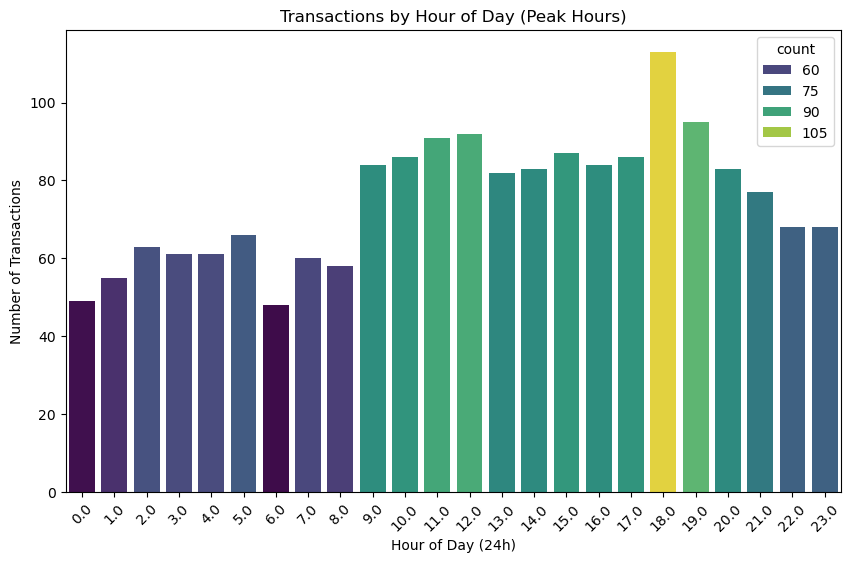

In [17]:
# Visualzing the sales based on hours in a day
plt.figure(figsize=(10, 6))
sns.barplot(x=peak_hours.index, y=peak_hours.values,hue=peak_hours, palette="viridis")
plt.title('Transactions by Hour of Day (Peak Hours)')
plt.xlabel('Hour of Day (24h)')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

plt.show()

### Interpretation: From this Barplot we can conclude that people mostly buy coffee at 18 hour or 6 PM of the day.

 ***

### B. Sales Analysis:

### ○ Which coffee earns the most revenue?

In [18]:
# Based on the combined dataset
revenue_by_coffee = combined.groupby('coffee_name')['money'].sum().sort_values(ascending=False).head(1)
print("Top Revenue-Earning Coffees:\n", revenue_by_coffee)

Top Revenue-Earning Coffees:
 coffee_name
Latte    28658.3
Name: money, dtype: float64


### Interpreation: The most revenue earning coffee is "LATTE".

### ○ What is the average ticket size for different coffees?

In [19]:
average_ticket_size = combined.groupby('coffee_name')['money'].mean().sort_values(ascending=False)
print("\n Average Ticket Size Of Different Coffees Are:\n", average_ticket_size)


 Average Ticket Size Of Different Coffees Are:
 coffee_name
Hot Chocolate                 36.072553
Cappuccino                    35.810716
Cocoa                         35.712593
Latte                         35.556203
Double espresso with milk     32.000000
Americano with Milk           30.666408
Hot milkshake                 30.000000
Mochaccino                    30.000000
Chocolate with coffee         30.000000
Coffee with Irish whiskey     29.000000
Double Irish whiskey          28.000000
Coffee with chocolate         28.000000
Vanilla with Irish whiskey    28.000000
Caramel with chocolate        28.000000
Caramel with Irish whiskey    28.000000
Caramel coffee                28.000000
Super chocolate               28.000000
Irish with chocolate          27.000000
Double espresso               27.000000
Vanilla coffee                27.000000
Double ristretto              27.000000
Irish whiskey with milk       27.000000
Chocolate with milk           27.000000
Americano          

### ○ How do daily sales vary over time?

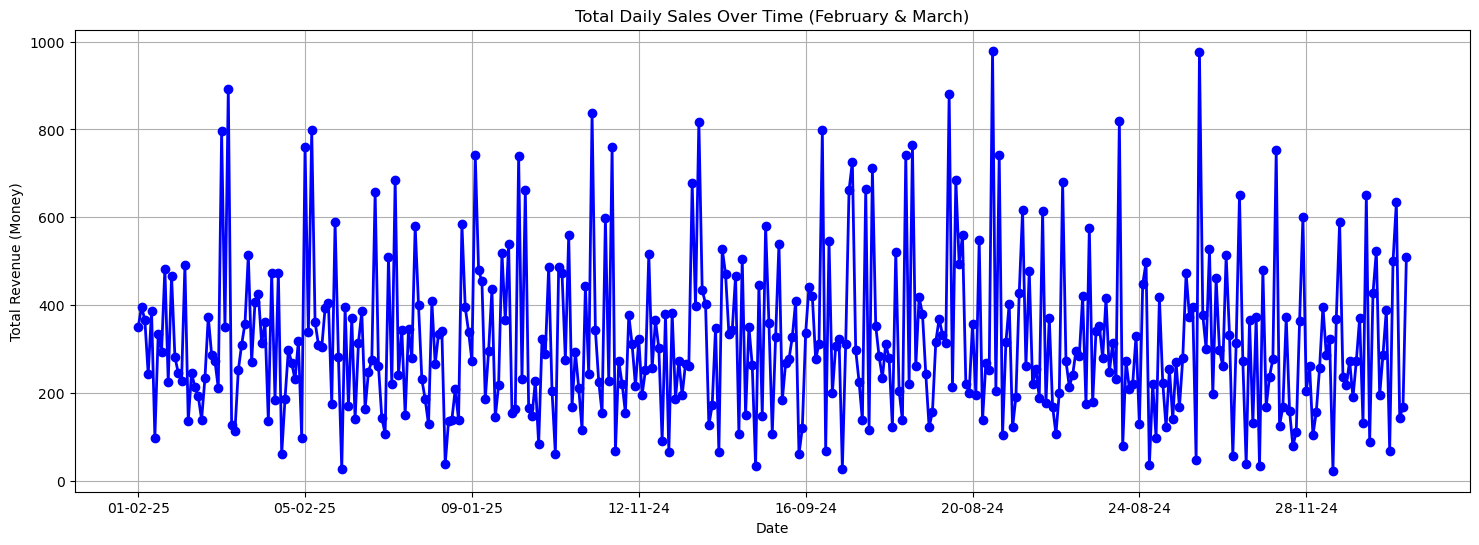

In [20]:
# Group date and money and sum
daily_sales = combined.groupby('date')['money'].sum()

plt.figure(figsize=(18, 6))
daily_sales.plot(kind='line', marker='o',linewidth=2, linestyle='-', color='blue')
plt.title('Total Daily Sales Over Time (February & March)')
plt.xlabel('Date')
plt.ylabel('Total Revenue (Money)')
plt.grid(True)
plt.show()

***

### C. Operational Insights:

### ○ Are there peak hours for transactions?

In [21]:
peak_hours.count

<bound method Series.count of hour
0.0      49
1.0      55
2.0      63
3.0      61
4.0      61
5.0      66
6.0      48
7.0      60
8.0      58
9.0      84
10.0     86
11.0     91
12.0     92
13.0     82
14.0     83
15.0     87
16.0     84
17.0     86
18.0    113
19.0     95
20.0     83
21.0     77
22.0     68
23.0     68
Name: count, dtype: int64>

### Interpretation: Yes, there are hours as we can conclude from above output which is 18 hour or 6 PM of the day. There are also many like 7 PM, 12 PM, 1 PM etc.

### ○ Which outlets or cards have frequent repeat customers?

In [22]:
# repeat cards count
card_counts = combined["card"].value_counts()
repeat_cards = card_counts[card_counts > 1].sort_values(ascending=False)
print("Number of unique cards with >1 purchase:", (card_counts > 1).sum())
print(repeat_cards.head(20))

Number of unique cards with >1 purchase: 545
card
ANON-0000-0000-0012    129
ANON-0000-0000-0141    108
ANON-0000-0000-1163     77
ANON-0000-0000-0276     69
ANON-0000-0000-0009     67
ANON-0000-0000-0507     51
ANON-0000-0000-0040     50
ANON-0000-0000-0097     47
ANON-0000-0000-1110     33
ANON-0000-0000-1170     32
ANON-0000-0000-0003     31
ANON-0000-0000-0570     30
ANON-0000-0000-1191     27
ANON-0000-0000-1152     23
ANON-0000-0000-0206     23
ANON-0000-0000-0333     22
ANON-0000-0000-0019     21
ANON-0000-0000-1158     20
ANON-0000-0000-0375     20
ANON-0000-0000-1165     20
Name: count, dtype: int64


### Interpretation: The card which is the most frequent customer is "ANON-0000-0000-0012".

### ○ Is there a noticeable difference in customer behavior between February and March?

In [23]:
# 1. Most popular coffee in each month
popular_feb = df1["coffee_name"].value_counts().head(1)
popular_mar = df2["coffee_name"].value_counts().head(1)

print("Most Popular Coffee in February:")
print(popular_feb)
print("\nMost Popular Coffee in March:")
print(popular_mar)

# 2. Preferred payment method
payment_feb = df1["cash_type"].value_counts().idxmax()
payment_mar = df2["cash_type"].value_counts().idxmax()

print("\nPreferred Payment in February:", payment_feb)
print("Preferred Payment in March:", payment_mar)

# 3. Total revenue comparison
revenue_feb = df1["money"].sum()
revenue_mar = df2["money"].sum()

print("\nTotal February Revenue:", revenue_feb)
print("Total March Revenue:", revenue_mar)

#  growth %
growth = ((revenue_mar - revenue_feb) / revenue_feb) * 100
print(f"\nRevenue Growth from Feb to Mar: {growth:.2f}%")

Most Popular Coffee in February:
coffee_name
Americano with Milk    824
Name: count, dtype: int64

Most Popular Coffee in March:
coffee_name
Americano with milk    44
Name: count, dtype: int64

Preferred Payment in February: card
Preferred Payment in March: card

Total February Revenue: 115431.58
Total March Revenue: 6890

Revenue Growth from Feb to Mar: -94.03%


### Interpretation: In February, CoffeeConnect had much higher sales and customer activity than in March. The most popular coffee in both months was Americano with Milk, showing steady customer preference. Card was the most used payment method in both months. However, revenue dropped sharply by about 94% in March, indicating a major fall in sales or customer visits.

***

### D. Cross-Month Comparison:

### ○ Combine both months and analyze growth trends.

In [24]:
# Convert 'date' to datetime, explicitly specifying the standard format
# This avoids guessing and resolves the UserWarning. 
combined["date"] = pd.to_datetime(combined["date"], format='%Y-%m-%d', errors='coerce')
# specifing the format as YY-MM-DD

combined["date"] = pd.to_datetime(combined["date"])
combined["month"] = combined["date"].dt.to_period("M")

monthly_sales = combined.groupby("month")["money"].sum()
print(monthly_sales)

Series([], Freq: M, Name: money, dtype: float64)


### Interpretation: Sales started lower in early 2024, gradually increased through the middle of the year, and reached a peak around October 2024 (₹10,994.94). After that, sales fluctuated but remained steady through 2025, with small drops in the middle months. The highest performance months were May, September, and October 2024, while the lowest was June 2025 (₹791.10).

### Overall, the data shows growth during mid-2024, followed by stabilization and minor decline in 2025, suggesting seasonal or demand-based variations in customer activity.

****

### ○ Track changes in payment preferences.

In [25]:
# Preferred payment method
payment_feb = df1["cash_type"].value_counts().idxmax()
payment_mar = df2["cash_type"].value_counts().idxmax()

print("Preferred Payment in February:", payment_feb)
print("\nPreferred Payment in March:", payment_mar)

Preferred Payment in February: card

Preferred Payment in March: card


### ○ Compare sales of specific coffees month-over-month.

In [26]:
# Combine both months
coffee_month = pd.concat([df1.assign(month='Feb'), df2.assign(month='Mar')])

# Count how many times each coffee was sold in Feb and Mar
pivot = coffee_month.pivot_table(index='coffee_name', columns='month', values='money', aggfunc='count', fill_value=0)

# Calculate % change from Feb to Mar
pivot['pct_change'] = ((pivot['Mar'] - pivot['Feb']) / pivot['Feb'].replace(0, 1)) * 100

# Show result
print(pivot)


month                       Feb  Mar   pct_change
coffee_name                                      
Americano                   578   15   -97.404844
Americano with Milk         824    0  -100.000000
Americano with milk           0   44  4400.000000
Cappuccino                  501   16   -96.806387
Caramel                       0    1   100.000000
Caramel coffee                0    2   200.000000
Caramel with Irish whiskey    0    8   800.000000
Caramel with chocolate        0    4   400.000000
Caramel with milk             0    3   300.000000
Chocolate                     0    1   100.000000
Chocolate with coffee         0    5   500.000000
Chocolate with milk           0   12  1200.000000
Cocoa                       243    0  -100.000000
Coffee with Irish whiskey     0   16  1600.000000
Coffee with chocolate         0    1   100.000000
Cortado                     292    0  -100.000000
Double Irish whiskey          0   12  1200.000000
Double chocolate              0    1   100.000000


***

## Extra Exercise:

### Basic Slicing & Filtering

### 1. Display all rows where money > 30 in index_1.csv

In [27]:
res1 = df1[df1["money"] > 30]
res1

,date,datetime,cash_type,card,money,coffee_name
0,01-03-24,15:50.5,card,ANON-0000-0000-0001,38.70,Latte
1,01-03-24,19:22.5,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,01-03-24,20:18.1,card,ANON-0000-0000-0002,38.70,Hot Chocolate
4,01-03-24,48:14.6,card,ANON-0000-0000-0004,38.70,Latte
5,01-03-24,39:47.7,card,ANON-0000-0000-0005,33.80,Americano with Milk
...,...,...,...,...,...,...
3630,23-03-25,07:11.3,card,ANON-0000-0000-1196,35.76,Latte
3631,23-03-25,34:54.9,card,ANON-0000-0000-1158,35.76,Cappuccino
3632,23-03-25,43:37.4,card,ANON-0000-0000-1315,35.76,Cocoa
3633,23-03-25,44:16.9,card,ANON-0000-0000-1315,35.76,Cocoa


### 2. Filter transactions from index_1.csv made with cash_type = 'card'

In [28]:
card_transactions = df1[df1['cash_type'] == 'card']
card_transactions

,date,datetime,cash_type,card,money,coffee_name
0,01-03-24,15:50.5,card,ANON-0000-0000-0001,38.70,Latte
1,01-03-24,19:22.5,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,01-03-24,20:18.1,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,01-03-24,46:33.0,card,ANON-0000-0000-0003,28.90,Americano
4,01-03-24,48:14.6,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
3631,23-03-25,34:54.9,card,ANON-0000-0000-1158,35.76,Cappuccino
3632,23-03-25,43:37.4,card,ANON-0000-0000-1315,35.76,Cocoa
3633,23-03-25,44:16.9,card,ANON-0000-0000-1315,35.76,Cocoa
3634,23-03-25,47:28.7,card,ANON-0000-0000-1316,25.96,Americano


### 3. Find rows in index_2.csv where coffee_name is either 'Latte' or 'Americano'

In [29]:
res3 = df2[df2["coffee_name"].isin(["Latte", "Americano"])]
res3

,date,datetime,cash_type,money,coffee_name
17,09-02-25,09-02-25 16:25,card,33,Latte
18,09-02-25,09-02-25 17:47,card,33,Latte
20,09-02-25,09-02-25 18:01,card,33,Latte
24,10-02-25,10-02-25 9:26,cash,25,Americano
25,10-02-25,10-02-25 12:26,cash,25,Americano
28,11-02-25,11-02-25 18:35,card,25,Americano
30,13-02-25,13-02-25 7:55,card,33,Latte
43,15-02-25,15-02-25 9:38,card,25,Americano
50,16-02-25,16-02-25 16:36,card,33,Latte
54,16-02-25,16-02-25 19:30,card,33,Latte


### 4. Retrieve all records from index_1.csv where datetime is after "2024-03-01 12:00:00"

In [30]:
# Convert 'datetime' column to proper datetime type
df1["datetime"] = pd.to_datetime(df1["datetime"], errors='coerce')

# Define the cutoff date and time
cutoff = pd.to_datetime("2024-03-01 12:00:00")

# Filter rows after cutoff
res4 = df1[df1["datetime"] > cutoff]

# Show result
res4

,date,datetime,cash_type,card,money,coffee_name
0,01-03-24,2026-01-13 15:50:30,card,ANON-0000-0000-0001,38.70,Latte
1,01-03-24,2026-01-13 19:22:30,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,01-03-24,2026-01-13 20:18:06,card,ANON-0000-0000-0002,38.70,Hot Chocolate
6,01-03-24,2026-01-13 19:02:48,card,ANON-0000-0000-0006,38.70,Hot Chocolate
8,01-03-24,2026-01-13 22:01:48,card,ANON-0000-0000-0008,38.70,Cocoa
...,...,...,...,...,...,...
3624,22-03-25,2026-01-13 06:21:36,card,ANON-0000-0000-1309,25.96,Americano
3625,22-03-25,2026-01-13 23:17:54,card,ANON-0000-0000-1267,30.86,Americano with Milk
3629,22-03-25,2026-01-13 16:52:42,card,ANON-0000-0000-1314,30.86,Americano with Milk
3630,23-03-25,2026-01-13 07:11:18,card,ANON-0000-0000-1196,35.76,Latte


### 5. Find the first 5 transactions of card = 'ANON-0000-0000-0002' from index_1.csv.

In [31]:
res5 = df1[df1["card"] == "ANON-0000-0000-0002"].sort_values("datetime")
# show result
res5

,date,datetime,cash_type,card,money,coffee_name
1,01-03-24,2026-01-13 19:22:30,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,01-03-24,2026-01-13 20:18:06,card,ANON-0000-0000-0002,38.7,Hot Chocolate


### Grouping & Aggregations

### 6. Group both datasets by coffee_name and find the total money collected per item

In [32]:
# Grouping and sorting based on highest total sales by a coffee 
tot1 = df1.groupby("coffee_name")["money"].sum().sort_values(ascending=False).reset_index(name="total_feb")
tot2 = df2.groupby("coffee_name")["money"].sum().sort_values(ascending=False).reset_index(name="total_mar")

# show result
print(tot1)
print("-"*50)
print(tot2)

           coffee_name  total_feb
0                Latte   27866.30
1  Americano with Milk   25269.12
2           Cappuccino   18034.14
3            Americano   15062.26
4        Hot Chocolate   10172.46
5                Cocoa    8678.16
6              Cortado    7534.86
7             Espresso    2814.28
--------------------------------------------------
                   coffee_name  total_mar
0          Americano with milk       1100
1                        Latte        792
2                Irish whiskey        525
3                   Cappuccino        480
4    Coffee with Irish whiskey        464
5      Irish whiskey with milk        405
6                    Americano        375
7                     Espresso        373
8         Double Irish whiskey        336
9          Chocolate with milk        324
10                         Tea        240
11  Caramel with Irish whiskey        224
12             Super chocolate        168
13                  Mochaccino        150
14       Choc

### 7. Count the number of transactions per cash_type in both datasets

In [33]:
# Count based on payment type
count_cash1 = df1["cash_type"].value_counts()
count_cash2 = df2["cash_type"].value_counts()

# show result
print(count_cash1)
print('-'*30)
print(count_cash2)

cash_type
card    3547
cash      89
Name: count, dtype: int64
------------------------------
cash_type
card    182
cash     80
Name: count, dtype: int64


### 8. Find the average money spent per coffee_name in index_1.csv.

In [34]:
avg1 = df1.groupby("coffee_name")["money"].mean().sort_values(ascending=False)

# show result
print(avg1)

coffee_name
Hot Chocolate          36.072553
Cappuccino             35.996287
Cocoa                  35.712593
Latte                  35.634655
Americano with Milk    30.666408
Americano              26.059273
Cortado                25.804315
Espresso               21.002090
Name: money, dtype: float64


### 9. Which coffee earned the highest total revenue in index_2.csv?

In [35]:
rev2 = df2.groupby("coffee_name")["money"].sum()

# show result
print("The coffee",rev2.idxmax() ,"is which earned the highest total revenue:", rev2.max())

The coffee Americano with milk is which earned the highest total revenue: 1100


### Merging / Joining

### 10. Create a new DataFrame with only card and money columns from both files and merge them using outer join on card.

In [36]:
# Since index_2.csv doesn't have 'card' column, we can't merge on card
print("Cannot merge on 'card' - index_2.csv doesn't have this column")

# Show what columns are available instead
print(f"index_1.csv columns: {list(df1.columns)}")
print(f"index_2.csv columns: {list(df2.columns)}")

Cannot merge on 'card' - index_2.csv doesn't have this column
index_1.csv columns: ['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name']
index_2.csv columns: ['date', 'datetime', 'cash_type', 'money', 'coffee_name']


### 11. Merge index_1.csv and index_2.csv using inner join on coffee_name. How many records do you get?

In [37]:
merged_inner = pd.merge(df1, df2, on="coffee_name", how="inner", suffixes=("_feb","_mar"))
# using len to figure out on how many resords there are
len(merged_inner)

37866

### 12. After merging on coffee_name, calculate total money per coffee_name

In [38]:
# If merged_inner has money_feb and money_mar (or money columns), sum grouped by coffee_name
money_cols = [c for c in merged_inner.columns if "money" in c]
tot_after_merge = merged_inner.groupby("coffee_name")[money_cols].sum().reset_index()
tot_after_merge["total_combined"] = tot_after_merge[money_cols].sum(axis=1)

# show result
tot_after_merge.sort_values("total_combined", ascending=False)

,coffee_name,money_feb,money_mar,total_combined
3,Latte,668791.20,619344,1288135.20
1,Cappuccino,288546.24,240480,529026.24
0,Americano,225933.90,216750,442683.90
2,Espresso,50657.04,49982,100639.04


### Analysis-Based

### 13. Combine both datasets and find the total revenue per date.

In [39]:
combined = pd.concat([df1.assign(month='Feb'), df2.assign(month='Mar')], ignore_index=True, sort=False)
total_rev_per_date = combined.groupby("date")["money"].sum().reset_index().sort_values("date")

# show result
total_rev_per_date

,date,money
0,01-02-25,349.26
1,01-03-24,396.30
2,01-03-25,365.98
3,01-04-24,242.80
4,01-06-24,386.80
...,...,...
376,31-05-24,499.96
377,31-07-24,633.84
378,31-08-24,143.02
379,31-10-24,169.00


### 14. From the combined data, identify the most frequently purchased coffee.

In [40]:
combined["coffee_name"].value_counts().head(5)

coffee_name
Americano with Milk    824
Latte                  806
Americano              593
Cappuccino             517
Cortado                292
Name: count, dtype: int64

### 15. How many unique cards made more than one purchase?

In [41]:
card_counts = combined["card"].value_counts()
num_repeat_cards = (card_counts > 1).sum()

# show result
print('Total number of unique cards made more than one purchase:',num_repeat_cards)

Total number of unique cards made more than one purchase: 545


### 16. From the combined data, add a column for hour and count transactions by hour of day.

In [42]:
# Fix datetime column
combined["datetime"] = pd.to_datetime(combined["datetime"], errors='coerce')

# Remove bad dates
combined = combined.dropna(subset=["datetime"])

# Get hour
combined["hour"] = combined["datetime"].dt.hour

# Count transactions per hour
transactions_by_hour = combined.groupby("hour").size().reset_index(name="transactions")

# Show result
print(transactions_by_hour.to_string(index=False))


 hour  transactions
    0            49
    1            55
    2            63
    3            61
    4            61
    5            66
    6            48
    7            60
    8            58
    9            84
   10            86
   11            91
   12            92
   13            82
   14            83
   15            87
   16            84
   17            86
   18           113
   19            95
   20            83
   21            77
   22            68
   23            68


### 17. Plot a bar chart of total revenue per coffee_name using Seaborn.

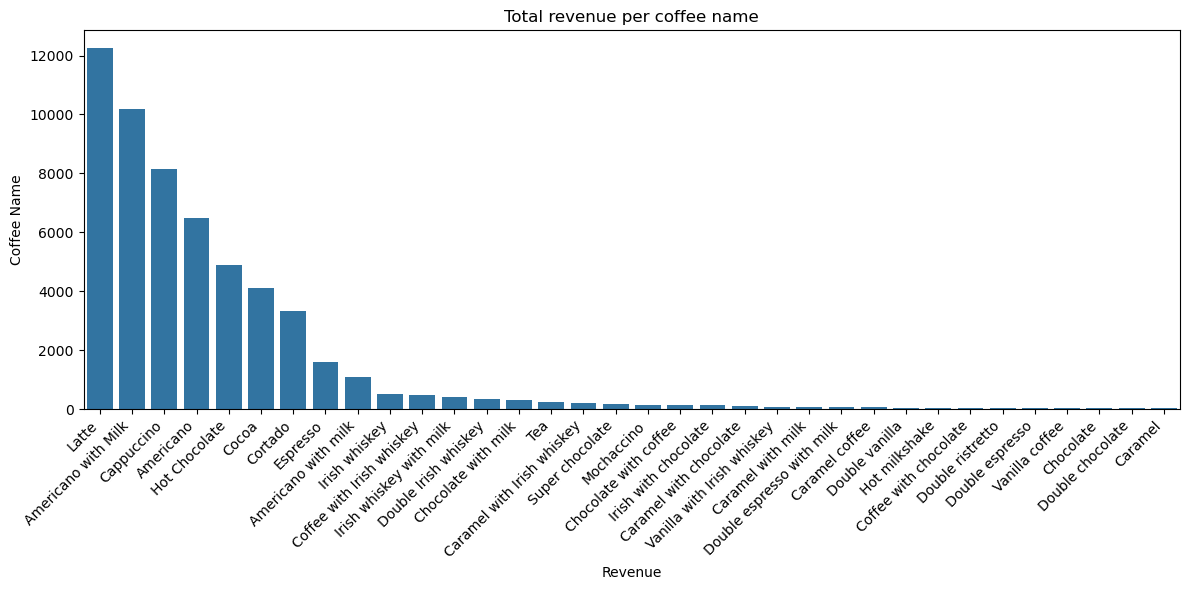

In [43]:
rev_per_coffee = combined.groupby("coffee_name")["money"].sum().reset_index().sort_values("money", ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=rev_per_coffee, x="coffee_name", y="money")
plt.xticks(rotation=45, ha="right")
plt.title("Total revenue per coffee name")
plt.xlabel('Revenue')
plt.ylabel('Coffee Name')
plt.tight_layout()
plt.show()

### 18. Plot a line chart showing total daily sales from combined dataset.

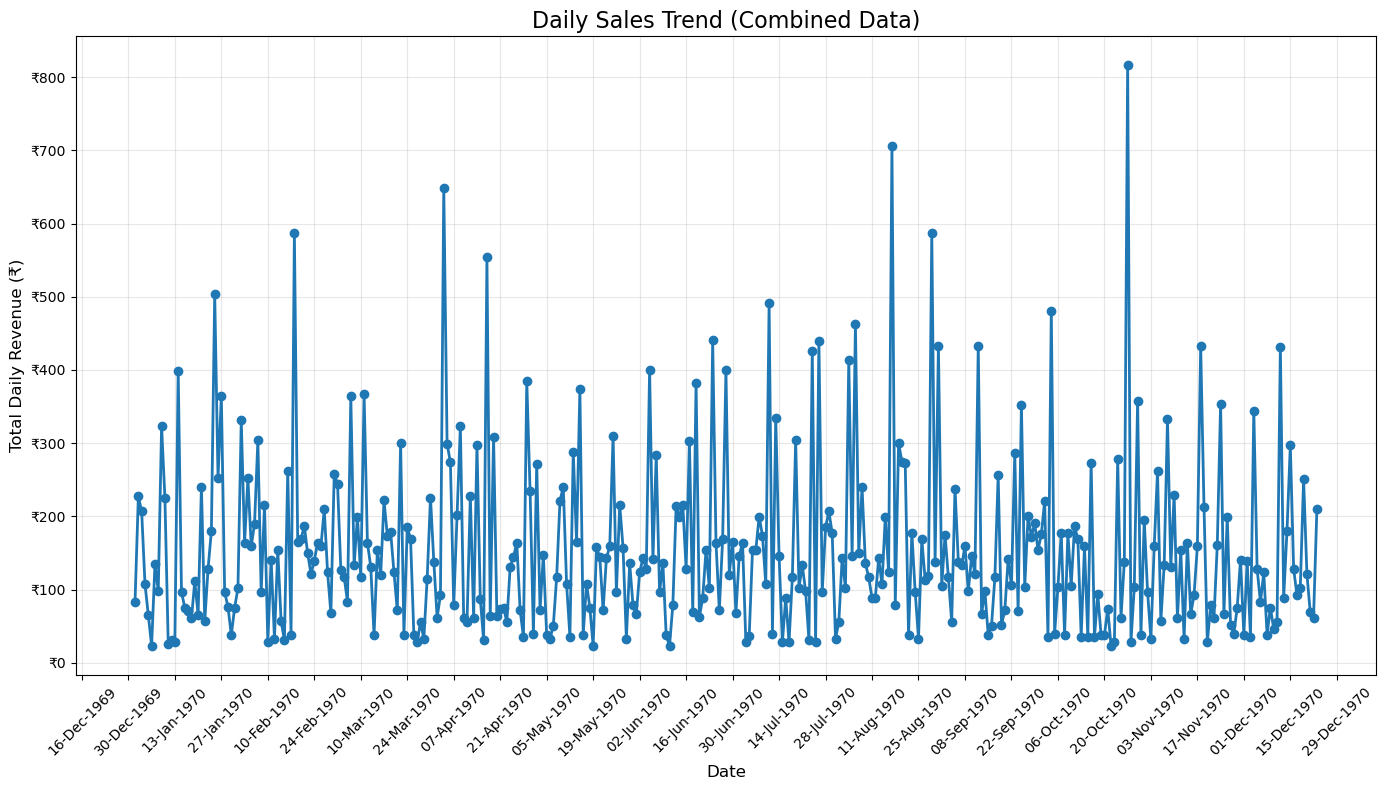

Daily sales summary:
Date range: 01-02-25 to 31-12-24
Average daily sales: ₹156.45
Highest sales day: 26-02-25 with ₹815.98
Lowest sales day: 01-07-24 with ₹23.02


In [44]:
daily_sales = combined.groupby('date')['money'].sum().sort_index()

plt.figure(figsize=(14, 8))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linewidth=2, markersize=6)
plt.title('Daily Sales Trend (Combined Data)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Daily Revenue (₹)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

import matplotlib.dates as mdates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))   # show one date every 2 weeks
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b-%Y"))

# Format y-axis to show currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x:.0f}'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Daily sales summary:")
print(f"Date range: {daily_sales.index.min()} to {daily_sales.index.max()}")
print(f"Average daily sales: ₹{daily_sales.mean():.2f}")
print(f"Highest sales day: {daily_sales.idxmax()} with ₹{daily_sales.max():.2f}")
print(f"Lowest sales day: {daily_sales.idxmin()} with ₹{daily_sales.min():.2f}")